In [53]:
import os, sys
#pathname = os.path.dirname(sys.argv[0])
#full_pathname = os.path.abspath(pathname)
#split_pathname = full_pathname.split(sep="mvesc")
#base_pathname = os.path.join(split_pathname[0], "mvesc")
#parentdir = os.path.join(base_pathname, "ETL")
#sys.path.insert(0,parentdir)
parentdir = os.path.abspath('/home/xcheng/mvesc/ETL')
sys.path.insert(0,parentdir)
from mvesc_utility_functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

%load_ext autotime
%matplotlib inline

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.41 ms


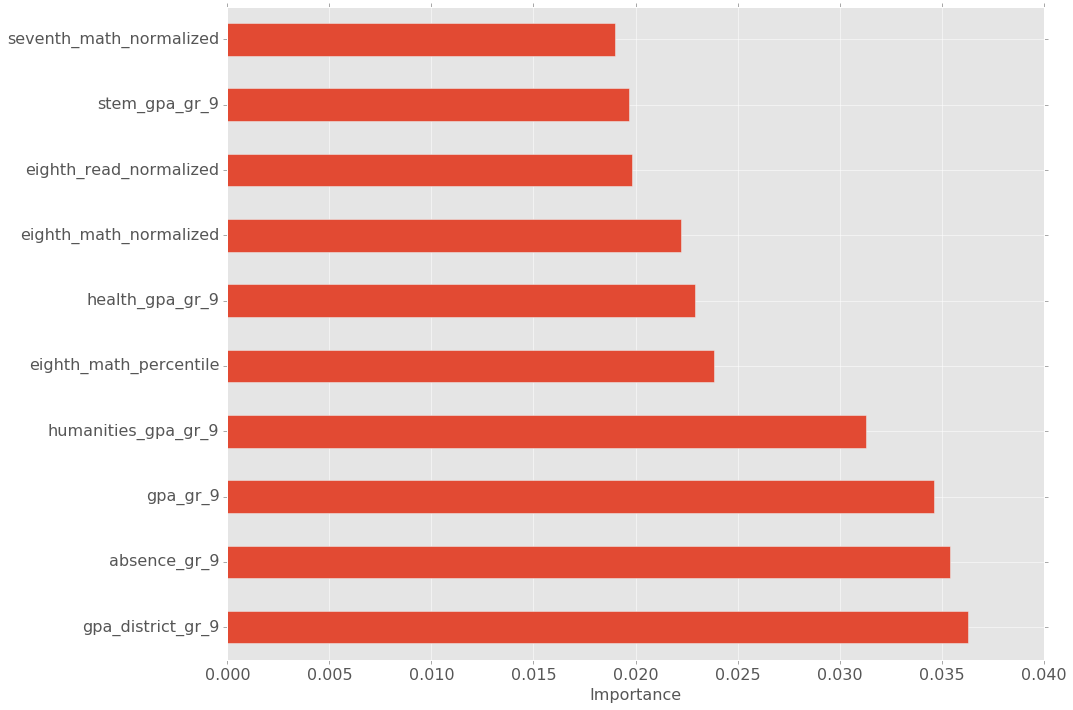

time: 2.38 s


In [81]:
#08_09_2016_grade_6_param_set_0_RF_ht_8585
#08_09_2016_grade_7_param_set_7_RF_ht_10497
#08_09_2016_grade_8_param_set_13_RF_ht_13254
#08_09_2016_grade_9_param_set_0_RF_ht_8645
#08_09_2016_grade_10_param_set_0_RF_ht_8680
table = '08_09_2016_grade_10_param_set_0_RF_ht_8680'
topN = 10 
title = ''
xlabel = 'Importance'
ylabel = ''
fontsize=16
figsize = (15, 10)
plt.style.use('ggplot')

with postgres_pgconnection_generator() as conn:
    with conn.cursor() as cursor:
        feature_importances = read_table_to_df(conn, table, schema='feature_scores')
    
df = feature_importances[['importance']]
df.index = feature_importances['feature']
ax = df.iloc[:topN,:].plot(kind='barh', title=title, figsize=figsize, fontsize=fontsize, legend=False)
plt.ylabel(ylabel, fontsize=fontsize)
plt.xlabel(xlabel, fontsize=fontsize)
plt.tight_layout()
plt.savefig('./figs/feature_importance_'+table+'.png', dpi=400)

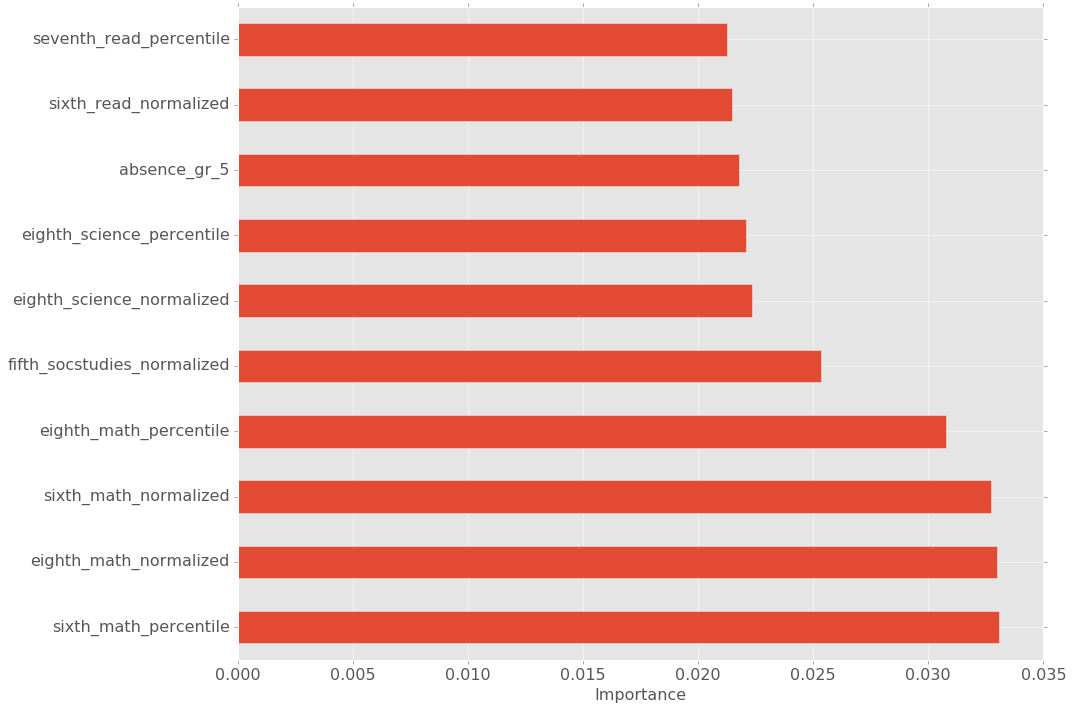

time: 581 ms


In [76]:
df = feature_importances[['importance']]
df.index = feature_importances['feature']
df = df.sort_values(by=['importance'], ascending=False)
ax = df.iloc[:topN,:].plot(kind='barh', title=title, figsize=figsize, fontsize=fontsize, legend=False)
plt.ylabel(ylabel, fontsize=fontsize)
plt.xlabel(xlabel, fontsize=fontsize)
plt.tight_layout()
#plt.savefig('./figs/feature_importance_'+table+'.png', dpi=400)
#Image(filename='./figs/feature_importance_'+table+'.png')

In [71]:
a = df.sort(columns=['importance'], ascending=False)

time: 2.85 ms


/home/jgutman/env/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [73]:
df.sort_values(by=['importance'], ascending=False)

,importance
feature,
sixth_math_percentile,0.033087
eighth_math_normalized,0.032983
sixth_math_normalized,0.032733
eighth_math_percentile,0.030768
fifth_socstudies_normalized,0.025343
eighth_science_normalized,0.022331
eighth_science_percentile,0.022070
absence_gr_5,0.021769
sixth_read_normalized,0.021488


time: 14.6 ms
